In [413]:
%matplotlib inline
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [6]:
dir = './data/'
df_train = pd.read_csv(dir+'quasar_train.txt')
df_test = pd.read_csv(dir+'quasar_test.txt')

In [7]:
df_train.describe()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.437280,0.832350,0.998720,1.087760,0.810820,0.888475,0.702390,1.024510,1.134610,0.922155,...,1.157225,1.174780,1.184900,1.172655,1.176870,1.132060,1.148390,1.147795,0.839805,0.512090
std,0.550454,0.851339,1.331848,1.185321,1.150744,1.115849,1.099269,0.972242,0.852812,1.029427,...,0.508772,0.546219,0.507259,0.553776,0.482319,0.563073,0.551507,0.525677,0.607804,0.562989
min,-0.952000,-1.304000,-1.938000,-2.852000,-1.853000,-2.167000,-2.775000,-2.553000,-0.955000,-1.543000,...,-0.418000,-0.353000,-0.011000,-0.824000,0.007000,-0.798000,-0.311000,-0.096000,-1.334000,-1.051000
25%,0.009250,0.252500,0.043750,0.267500,0.080250,0.116500,0.091500,0.414750,0.479750,0.222750,...,0.835250,0.868500,0.812000,0.818500,0.841750,0.732750,0.824750,0.801250,0.463250,0.166000
50%,0.430500,0.848000,0.889500,0.908000,0.802000,0.877000,0.749000,1.021000,1.119000,0.942500,...,1.180500,1.132000,1.208000,1.225000,1.162500,1.143500,1.141000,1.146000,0.800500,0.489500
75%,0.819750,1.450750,1.832750,1.918750,1.428750,1.653000,1.459250,1.634500,1.631000,1.505750,...,1.469750,1.502500,1.543500,1.538000,1.528500,1.522250,1.531750,1.499000,1.227000,0.874250
max,2.035000,3.289000,5.700000,4.132000,4.229000,4.476000,3.241000,3.782000,3.249000,4.384000,...,2.455000,2.685000,2.552000,2.616000,2.298000,2.560000,2.702000,2.643000,2.936000,2.092000


In [9]:
df_test.describe()

,1150.00,1151.00,1152.00,1153.00,1154.00,1155.00,1156.00,1157.00,1158.00,1159.00,...,1590.00,1591.00,1592.00,1593.00,1594.00,1595.00,1596.00,1597.00,1598.00,1599.00
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,...,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.546340,0.505340,0.84710,1.005520,0.979680,0.723280,0.79656,0.904620,1.188020,0.745640,...,1.138680,1.01492,1.143340,1.143440,1.123280,1.248420,1.154060,1.216060,0.733400,0.543280
std,0.688326,0.861867,1.26817,0.984798,1.097701,1.131412,1.05171,0.995441,0.764195,1.001657,...,0.485983,0.54000,0.486824,0.513628,0.564634,0.481392,0.541507,0.501718,0.578482,0.571459
min,-1.170000,-1.100000,-1.81000,-1.320000,-1.050000,-1.910000,-1.96000,-0.983000,-0.343000,-1.310000,...,0.123000,-0.20900,0.239000,0.035000,0.080000,0.137000,-0.225000,0.254000,-0.648000,-0.464000
25%,0.165250,-0.188750,0.05400,0.327250,0.339750,-0.033000,0.08575,0.211000,0.541250,0.067000,...,0.817250,0.73625,0.819000,0.844500,0.730500,0.834750,0.868250,0.783250,0.382500,0.195500
50%,0.478500,0.568000,0.80250,0.984500,0.908500,0.640500,0.68950,0.897500,1.345000,0.830000,...,1.135000,1.04500,1.135000,1.020000,1.055000,1.275000,1.100000,1.150000,0.738500,0.614000
75%,1.120000,1.048500,1.68500,1.712500,1.705000,1.312500,1.69750,1.485000,1.640000,1.307500,...,1.485000,1.39750,1.482500,1.357500,1.525000,1.625000,1.557500,1.567500,1.055000,0.896750
max,2.030000,2.320000,3.74000,3.010000,3.970000,3.400000,2.79000,3.580000,2.610000,2.840000,...,2.180000,1.99000,2.300000,2.320000,2.810000,2.700000,2.360000,2.320000,1.860000,1.660000


<a id='5.b.i'></a>
### Problem 5.b.i)

In [176]:
x_1_row = np.array([float(column) for column in df_train.columns])
x_ones = np.ones(x_1_row.shape)
x = np.vstack((x_1_row, x_ones)).transpose()
y_1_row = df_train.loc[0,:].to_numpy()
y = y_1_row.T

In [178]:
x_x_t = x.T @ x
x_x_t_inv = np.linalg.inv(x_x_t)
theta = x_x_t_inv @ x.T @ y

In [179]:
theta

array([-9.81122145e-04,  2.51339906e+00])

In [180]:
theta = theta.reshape((theta.shape[0], 1))

In [182]:
y_hat = x @ theta

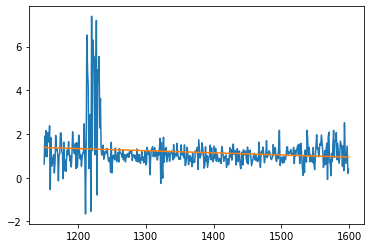

In [183]:
plt.plot(x_1_row.T,y_1_row.T)
plt.plot(x_1_row.T, y_hat)

<a id='5.b.ii'></a>
### Problem 5.b.ii)

In [193]:
def get_weights(X, x_data, tau=5.0):
    w = np.exp(-(X - x_data)**2/(2*tau**2))
    w = np.diag(w)
    return w

In [194]:
query_point = 1215.67 # Value for Lyman-alpha line
X_query = np.zeros((x.shape[0], 1)) + query_point

In [195]:
np.diag(np.exp(-(x[:,0] - x[0,0])**2/(2*5.0**2))).shape

(450, 450)

In [196]:
x.shape

(450, 2)

In [197]:
weights = get_weights(x[:,0], x[0, 0])

In [ ]:
y_hat_lwlr = np.zeros(y.shape[0])

In [220]:
# Tau = 5
for i, row in enumerate(x):
    weights = get_weights(x[:,0], row[0])
    x_data = x
    x_t_w = x_data.T @ weights
    x_t_w_x = x_t_w @ x_data
    x_t_w_x_inv = np.linalg.inv(x_t_w_x)
    theta_lwlr = x_t_w_x_inv @ x_t_w @ y
    y_hat_lwlr[i] = theta_lwlr.T.dot(row)

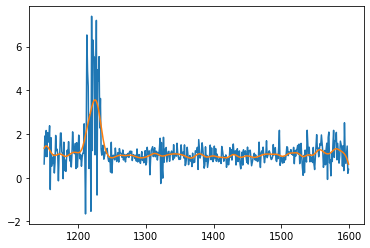

In [221]:
plt.plot(x_1_row.T,y_1_row.T)
plt.plot(x_1_row.T, y_hat_lwlr)

<a id='5.b.iii'></a>
### Problem 5.b.iii)

In [253]:
taus = [1, 10, 100, 1000]

In [254]:
y_hat_lwlrs.shape

(450, 4)

In [255]:
y_hat_lwlrs = np.zeros((y.shape[0], len(taus)))

In [256]:
for j, tau in enumerate(taus):
    print(f'{j}, {tau}')

0, 1
1, 10
2, 100
3, 1000


In [257]:
for j, tau in enumerate(taus):
    print(f'{j}, {tau}')
    for i, row in enumerate(x):
        weights = get_weights(x[:,0], row[0], tau)
        x_data = x
        x_t_w = x_data.T @ weights
        x_t_w_x = x_t_w @ x_data
        x_t_w_x_inv = np.linalg.inv(x_t_w_x)
        theta_lwlr = x_t_w_x_inv @ x_t_w @ y
        y_hat_lwlrs[i,j] = theta_lwlr.T.dot(row)        

0, 1
1, 10
2, 100
3, 1000


0, 1
1, 10
2, 100
3, 1000


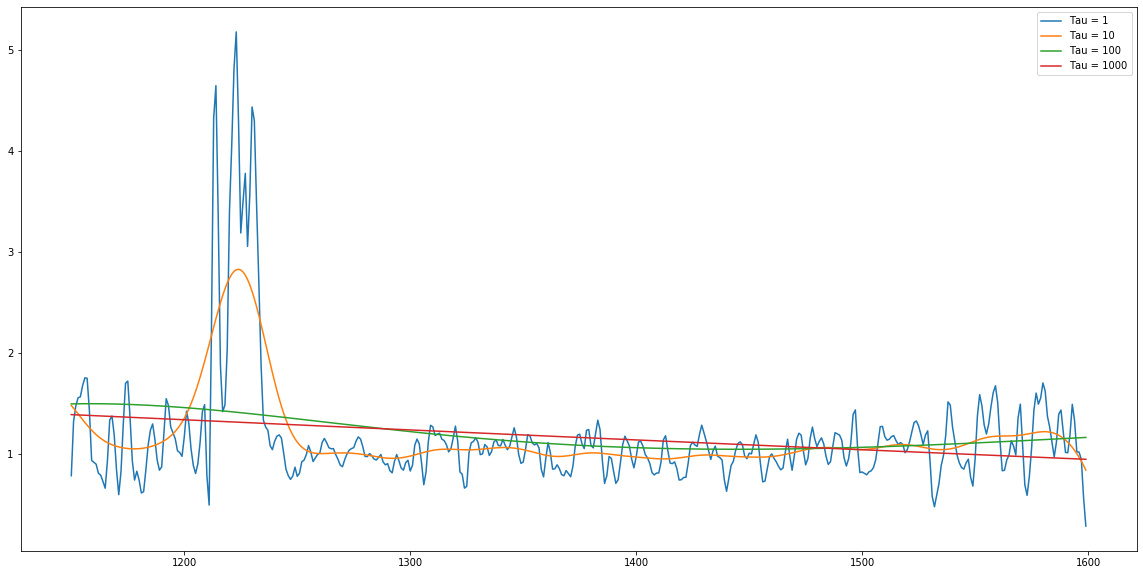

In [258]:
plt.figure(figsize=(20,10))
for i, tau in enumerate(taus):
    print(f'{i}, {tau}')
    plt.plot(x_1_row.T, y_hat_lwlrs[:,i], label='Tau = '+str(tau))
plt.legend()

### As you can see above, as Tau increases, the prediction lines become smoother and approach linearity, this is to be expected, as increasing tau has effect of pushing all exponents in each weight term to 0, thus pushing each each weight to 1.

<a id='5.c.i'></a>
### Problem 5.c.i)

#### Train

In [259]:
Y_train = df_train.to_numpy()

In [260]:
Y_train.shape

(200, 450)

In [262]:
# iterate thru each row of Y's, (200 rows)
#   iterate thru each cell in Y's
#     calculate w, theta, and y_hat
# 

array([1.15e+03, 1.00e+00])

In [272]:
Y_train.shape

(200, 450)

In [449]:
def get_smoothed_ys(X, Y):
    y_hat_lwlrs = np.zeros((Y.shape[0], Y.shape[1]))
    for i, y_i in enumerate(Y_train):
        if i % 10 == 0 :
            print(f'starting sample i={i}')
        for j, row in enumerate(X):
            weights = get_weights(X[:,0], row[0])
            x_t_w = X.T @ weights
            x_t_w_x = x_t_w @ X
            x_t_w_x_inv = np.linalg.inv(x_t_w_x)
            theta_lwlr = x_t_w_x_inv @ x_t_w @ y_i
            y_hat_lwlrs[i,j] = theta_lwlr.T.dot(row)
    return y_hat_lwlrs

starting sample i=0
starting sample i=10
starting sample i=20
starting sample i=30
starting sample i=40
starting sample i=50
starting sample i=60
starting sample i=70
starting sample i=80
starting sample i=90
starting sample i=100
starting sample i=110
starting sample i=120
starting sample i=130
starting sample i=140
starting sample i=150
starting sample i=160
starting sample i=170
starting sample i=180
starting sample i=190


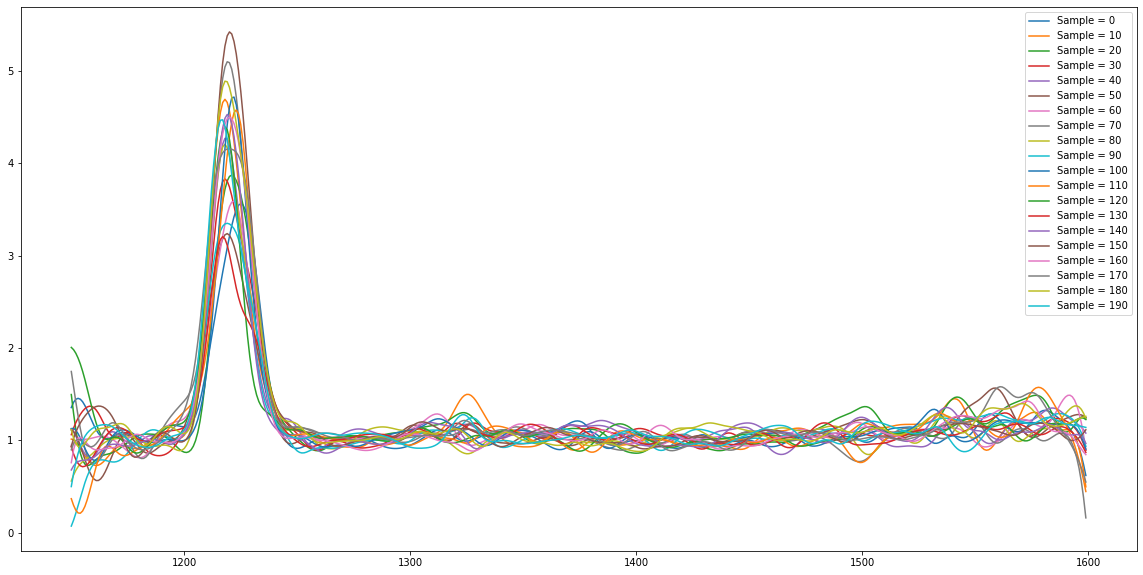

In [450]:
y_hat_lwlrs_train = get_smoothed_ys(x, Y_train)
plt.figure(figsize=(20,10))
for i, y_i in enumerate(Y_train):
    if i % 10 == 0 :
        plt.plot(x_1_row.T, y_hat_lwlrs_train[i,:], label='Sample = '+str(i))
plt.legend()

In [452]:
y_hat_lwlrs_train[:,0:3]

array([[ 1.35457751,  1.411428  ,  1.44418291],
       [ 0.8630299 ,  0.93499234,  0.98748083],
       [-0.54199083, -0.3879195 , -0.23759803],
       [ 0.31531147,  0.35066741,  0.39968169],
       [ 0.55701048,  0.71910525,  0.84458201],
       [ 0.69789757,  0.74424111,  0.76562349],
       [ 1.04537124,  1.03496393,  1.02117741],
       [ 0.52013086,  0.57105724,  0.62860196],
       [ 0.40615345,  0.46198314,  0.52249446],
       [ 0.38137544,  0.50685178,  0.60261287],
       [ 1.01302133,  1.00436993,  0.98172846],
       [ 0.55022006,  0.63932935,  0.721485  ],
       [ 0.97811234,  0.97718597,  0.96687084],
       [ 0.53232309,  0.55838335,  0.58685354],
       [ 0.68215909,  0.82706817,  0.94362131],
       [ 1.46454835,  1.4063712 ,  1.33182718],
       [ 0.50358664,  0.64652466,  0.76357751],
       [ 1.09692075,  1.07507166,  1.05561847],
       [ 0.83735692,  0.88039615,  0.93062541],
       [ 0.89837811,  0.83721395,  0.7968702 ],
       [ 1.49556103,  1.29328882,  1.115

#### Test

In [288]:
Y_test = df_test.to_numpy()

In [289]:
y_hat_lwlrs_test = np.zeros((Y_test.shape[0], Y_test.shape[1]))
for i, y_i in enumerate(Y_test):
    if i % 10 == 0 :
        print(f'starting sample i={i}')
    for j, row in enumerate(x):
        weights = get_weights(x[:,0], row[0])
        x_t_w = x.T @ weights
        x_t_w_x = x_t_w @ x
        x_t_w_x_inv = np.linalg.inv(x_t_w_x)
        theta_lwlr = x_t_w_x_inv @ x_t_w @ y_i
        y_hat_lwlrs_test[i,j] = theta_lwlr.T.dot(row)

starting sample i=0
starting sample i=10
starting sample i=20
starting sample i=30
starting sample i=40


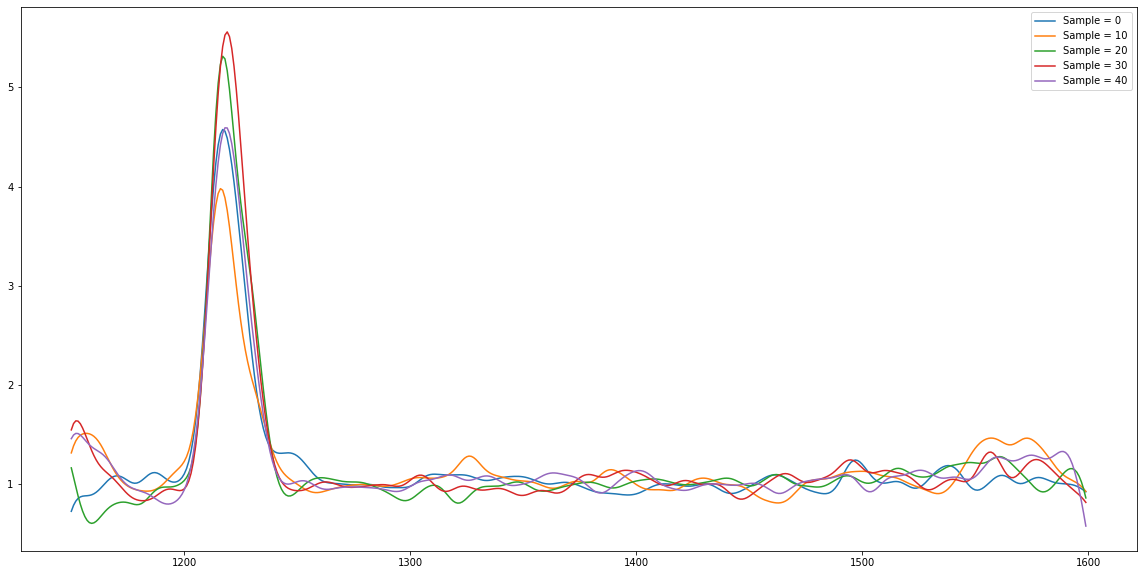

In [290]:
plt.figure(figsize=(20,10))
for i, y_i in enumerate(Y_test):
    if i % 10 == 0 :
        plt.plot(x_1_row.T, y_hat_lwlrs_test[i,:], label='Sample = '+str(i))
plt.legend()

In [291]:
y_hat_lwlrs_test.shape

(50, 450)

In [355]:
# Return distance from sample i of y to y
def d(f_right, f_right_i):
    diff = (f_right - f_right_i)
    return np.sum((f_right - f_right_i)**2, axis=1)

In [418]:
def ker(t):
    return np.maximum(1 -t, 0)

In [419]:
def nearest_neighbors(d, k=3):
    nearest_indices = np.argsort(d)
    return nearest_indices[:k]

In [420]:
# For each sample in y_right
# 

In [467]:
left_upper_bound_index = 50
right_lower_bound_index = 150

x_left = x[:left_upper_bound_index]
x_right = x[right_lower_bound_index:]

y_hat_lwlrs_train_left = y_hat_lwlrs_train[:, :left_upper_bound_index]
y_hat_lwlrs_train_right = y_hat_lwlrs_train[:, right_lower_bound_index:]

y_hat_lwlrs_test_left = y_hat_lwlrs_test[:, :left_upper_bound_index]
y_hat_lwlrs_test_right = y_hat_lwlrs_test[:, right_lower_bound_index:]

f_left_train = np.zeros(y_hat_lwlrs_train_left.shape)
for i, y_i in enumerate(y_hat_lwlrs_train_right):
    distances = d(y_hat_lwlrs_train_right, y_i)
    h = np.max(distances)
    knn = nearest_neighbors(distances, 3)
    
    weights = ker(distances/h)[knn]
    weights = np.reshape(weights, (weights.shape[0], 1))
    f_left_numerator = np.sum(y_hat_lwlrs_train_left[knn,:].T * weights.T, 1)
    f_left_denominator = np.sum(weights)
    f_left = f_left_numerator/f_left_denominator
    f_left_train[i, :] = f_left

In [502]:
y_hat_lwlrs_train.shape

(200, 450)

In [468]:
x_left[0:5,0]

array([1150., 1151., 1152., 1153., 1154.])

[]

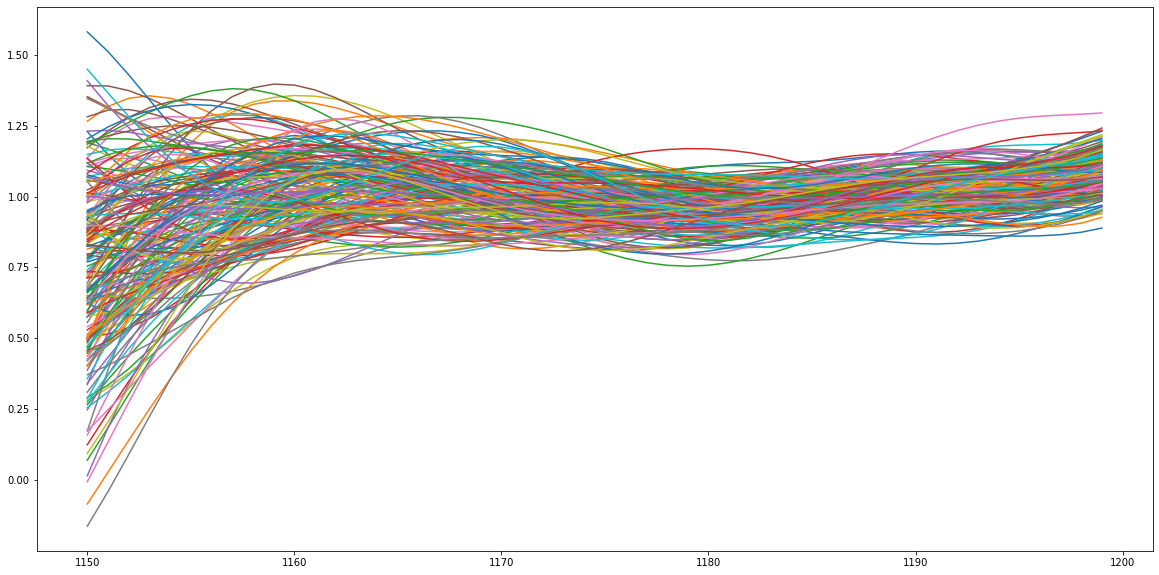

In [475]:
plt.figure(figsize=(20,10))
plt.plot(x_left[:,0], f_left_train.T)
plt.plot()

<a id='5.c.ii'></a>
### Problem 5.c.ii)

In [482]:
# Average Squared Error, Training
np.mean(np.sum((f_left_train - y_hat_lwlrs_train_left)**2, 1))

1.0663958023836653

In [511]:
def estimate_f_left(y_train, y_test, k=3, left_upper_bound_index=50, right_lower_bound_index=150):
    y_train_left = y_train[:, :left_upper_bound_index]
    y_train_right = y_train[:, right_lower_bound_index:]

    y_test_left = y_test[:, :left_upper_bound_index]
    y_test_right = y_test[:, right_lower_bound_index:]
    f_lefts = np.zeros(y_test_left.shape)
    for i, y_i in enumerate(y_test_right):
        distances = d(y_train_right, y_i)
        h = np.max(distances)
        knn = nearest_neighbors(distances, 3)

        weights = ker(distances/h)[knn]
        weights = np.reshape(weights, (weights.shape[0], 1))
        f_left_numerator = np.sum(y_train_left[knn,:].T * weights.T, 1)
        f_left_denominator = np.sum(weights)
        f_left = f_left_numerator/f_left_denominator
        f_lefts[i, :] = f_left
    return f_lefts

In [512]:
f_left_train2 = estimate_f_left(y_hat_lwlrs_train, y_hat_lwlrs_test, 3)

[]

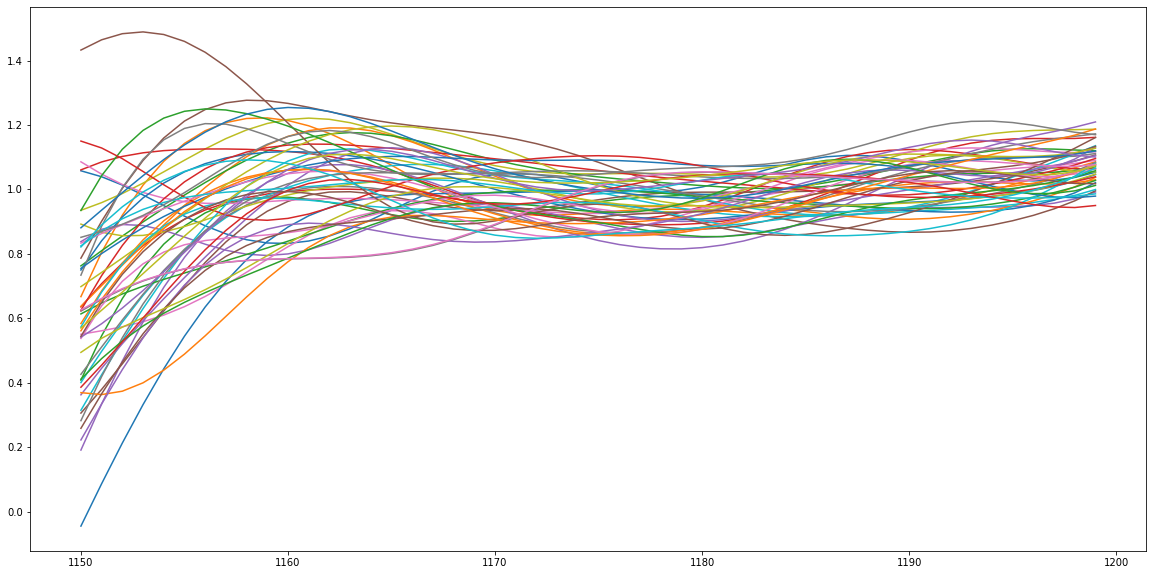

In [513]:
plt.figure(figsize=(20,10))
plt.plot(x_left[:,0], f_left_train2.T)
plt.plot()

<a id='5.c.iii'></a>
### Problem 5.c.iii)

In [514]:
# Average Squared Error, Test
np.mean(np.sum((f_left_train2 - y_hat_lwlrs_test_left)**2, 1))

2.709969579420137

In [508]:
f_left_train2[0:3,0:3]

array([[0.77653829, 0.84608028, 0.9072164 ],
       [1.01498452, 1.05470632, 1.07840184],
       [0.01733596, 0.12526184, 0.23006806]])

In [515]:
f_left_train2.shape

(50, 50)

In [516]:
y_hat_lwlrs_train.shape

(200, 450)

[]

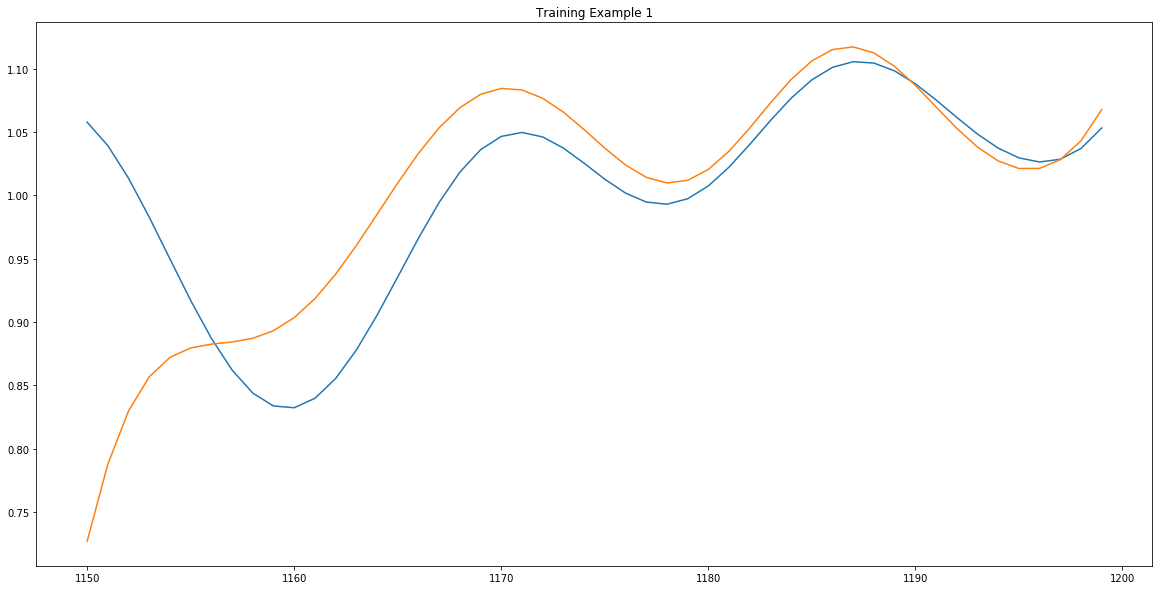

In [522]:
plt.figure(figsize=(20,10))
index=0
plt.plot(x_left[:,0], f_left_train2[index,:].T, label="Fitted")
plt.plot(x_left[:,0], y_hat_lwlrs_test_left[index,:].T, label="Actual")
plt.title('Training Example ' + str(index+1))
plt.plot()

[]

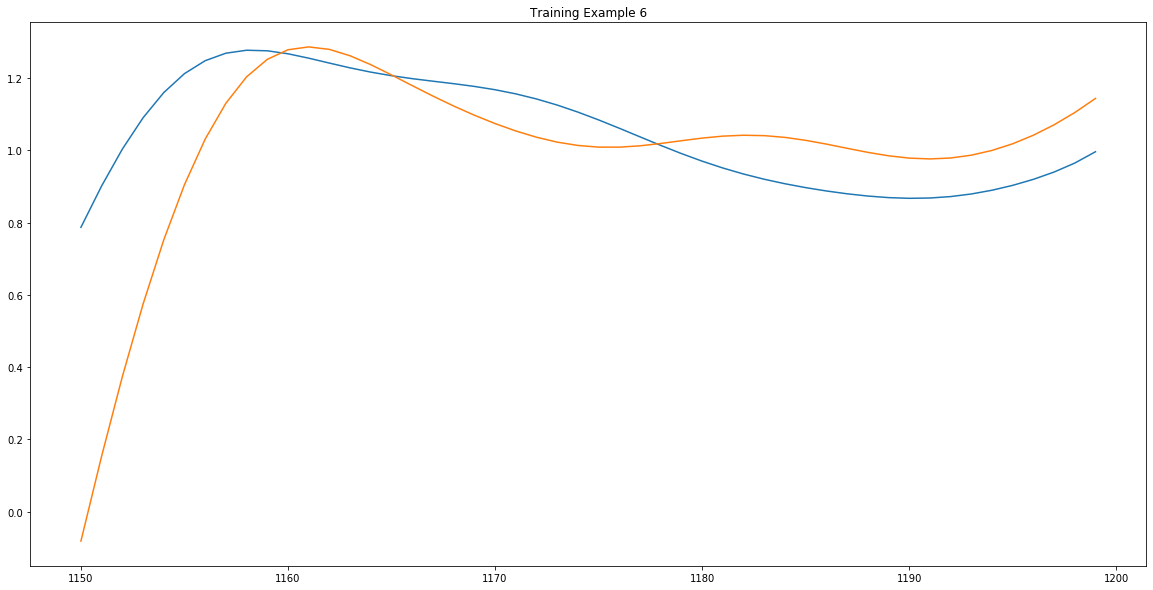

In [523]:
plt.figure(figsize=(20,10))
index=5
plt.plot(x_left[:,0], f_left_train2[index,:].T, label="Fitted")
plt.plot(x_left[:,0], y_hat_lwlrs_test_left[index,:].T, label="Actual")
plt.title('Training Example ' + str(index+1))
plt.plot()